In [89]:
pip install pandas tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
df.shape

(891, 12)

In [93]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked'])

In [94]:
# Convert Sex and Embarked to numeric values using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [95]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [96]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,28.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [97]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\aviad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop]
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6007 - loss: 0.6941 - val_accuracy: 0.6517 - val_loss: 0.6263
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6539 - loss: 0.6165 - val_accuracy: 0.7753 - val_loss: 0.5303
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7236 - loss: 0.5514 - val_accuracy: 0.8427 - val_loss: 0.4599
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4896 - val_accuracy: 0.8202 - val_loss: 0.4198
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8185 - loss: 0.4547 - val_accuracy: 0.8427 - val_loss: 0.4016
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4687 - val_accuracy: 0.8315 - val_loss: 0.3913
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8029 - loss: 0.4483 - val_accuracy: 0.8315 - val_loss: 0.3874
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.4388 - val_accuracy: 0.8427 - val_loss:

<Figure size 800x500 with 0 Axes>

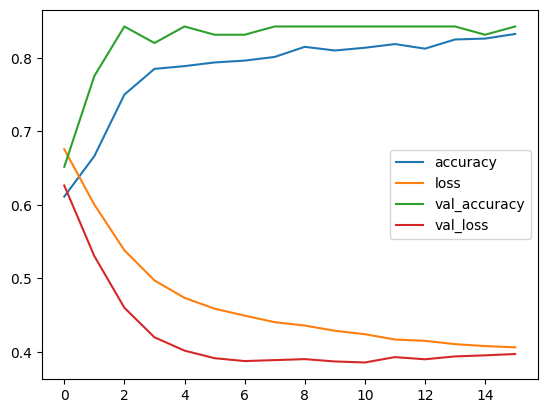

In [101]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [102]:
loss, accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8549 - loss: 0.3639 
Validation Accuracy: 0.8427


In [103]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
y_pred_probs = model.predict(X_val_scaled)

# Convert to binary predictions (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1, Accuracy
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
[[51  7]
 [ 7 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.77      0.77      0.77        31

    accuracy                           0.84        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.84      0.84      0.84        89



In [104]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
# Drop the same unused columns
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
test_df["Age"] = test_df["Age"].fillna(df["Age"].median())  # use same median as training set
test_df["Fare"] = test_df["Fare"].fillna(df["Fare"].median())

# Encode categorical columns
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"], drop_first=True)

test_df = test_df[X.columns]


In [107]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,28.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [108]:
test_scaled = scaler.transform(test_df)
test_predictions = model.predict(test_scaled)
test_predictions = (test_predictions > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [109]:
# Load original test.csv again to get PassengerId
original_test = pd.read_csv("test.csv")

# Create submission DataFrame
submission_df = pd.DataFrame({
    "PassengerId": original_test["PassengerId"],
    "Survived": test_predictions.flatten()
})

submission_df.to_csv("titanic_predictions.csv", index=False)
print("✅ Predictions saved to titanic_predictions.csv")

✅ Predictions saved to titanic_predictions.csv


In [ ]:
# Load the ground truth
ground_truth = pd.read_csv("gender_submission.csv")

# Load your model predictions
predictions = pd.read_csv("titanic_predictions.csv")

# Merge on PassengerId to align predictions and ground truth
merged = pd.merge(predictions, ground_truth, on="PassengerId", suffixes=('_pred', '_true'))

# Extract predicted and true labels
y_pred = merged["Survived_pred"]
y_true = merged["Survived_true"]

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Confusion Matrix:
[[251  15]
 [  9 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.91      0.94      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

